<a href="https://colab.research.google.com/github/marceloBaumgratz/Challenge_TelecomX/blob/main/notebooks/TelecomX_BR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracão

In [19]:
import pandas as pd

In [20]:
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/main/TelecomX_Data.json'
dados = pd.read_json(url)

df = pd.json_normalize(dados.to_dict(orient="records"))

df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


#🔧 Transformação

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [22]:
df["Churn"].value_counts()

,count
Churn,
No,5174
Yes,1869
,224


In [23]:
df = df[df["Churn"] != ""]

In [24]:
df.shape

(7043, 21)

In [25]:
df["account.Charges.Total"].value_counts().head()

,count
account.Charges.Total,
20.2,11
,11
19.75,9
19.9,8
19.65,8


In [26]:
df["account.Charges.Total"].isin(["", " "]).sum()

np.int64(11)

In [27]:
df["account.Charges.Total"] = df["account.Charges.Total"].replace(["", " "], pd.NA)

In [28]:
df["account.Charges.Total"] = pd.to_numeric(df["account.Charges.Total"])

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer.gender            7043 non-null   object 
 3   customer.SeniorCitizen     7043 non-null   int64  
 4   customer.Partner           7043 non-null   object 
 5   customer.Dependents        7043 non-null   object 
 6   customer.tenure            7043 non-null   int64  
 7   phone.PhoneService         7043 non-null   object 
 8   phone.MultipleLines        7043 non-null   object 
 9   internet.InternetService   7043 non-null   object 
 10  internet.OnlineSecurity    7043 non-null   object 
 11  internet.OnlineBackup      7043 non-null   object 
 12  internet.DeviceProtection  7043 non-null   object 
 13  internet.TechSupport       7043 non-null   object 
 1

In [30]:
df["Contas_Diarias"] = df["account.Charges.Monthly"] / 30

In [31]:
df[["account.Charges.Monthly", "Contas_Diarias"]].head()

,account.Charges.Monthly,Contas_Diarias
0,65.6,2.186667
1,59.9,1.996667
2,73.9,2.463333
3,98.0,3.266667
4,83.9,2.796667


#📊 Carga e análise

In [32]:
df.describe()

,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly,account.Charges.Total,Contas_Diarias
count,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441,2.158723
std,0.368612,24.559481,30.090047,2266.771362,1.003002
min,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,9.000000,35.500000,401.450000,1.183333
50%,0.000000,29.000000,70.350000,1397.475000,2.345000
75%,0.000000,55.000000,89.850000,3794.737500,2.995000
max,1.000000,72.000000,118.750000,8684.800000,3.958333


In [33]:
churn_contagem = df["Churn"].value_counts()

churn_percentual = df["Churn"].value_counts(normalize=True) * 100

churn_percentual

,proportion
Churn,
No,73.463013
Yes,26.536987


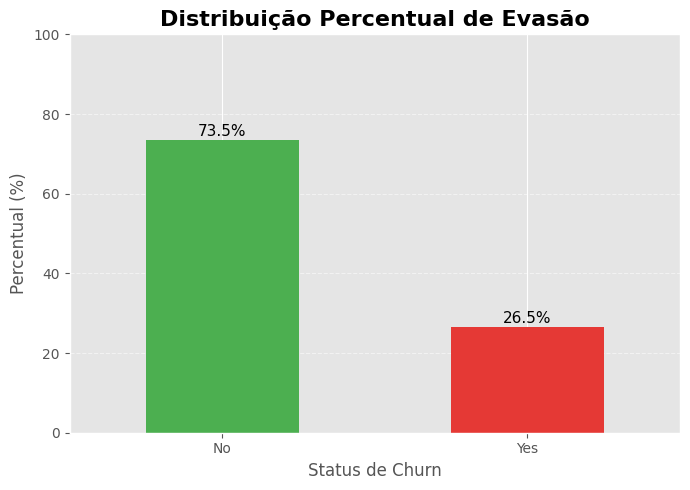

In [34]:
import matplotlib.pyplot as plt

plt.style.use("ggplot")
plt.figure(figsize=(7,5))
ax = churn_percentual.plot(kind="bar", color=["#4CAF50", "#E53935"])

plt.title("Distribuição Percentual de Evasão", fontsize=16, weight="bold")
plt.xlabel("Status de Churn", fontsize=12)
plt.ylabel("Percentual (%)", fontsize=12)

plt.xticks(rotation=0)
plt.ylim(0, 100)

plt.grid(axis="y", linestyle="--", alpha=0.5)

for i, valor in enumerate(churn_percentual):
    plt.text(i, valor + 1, f"{valor:.1f}%", ha='center', fontsize=11)

plt.tight_layout()
plt.show()

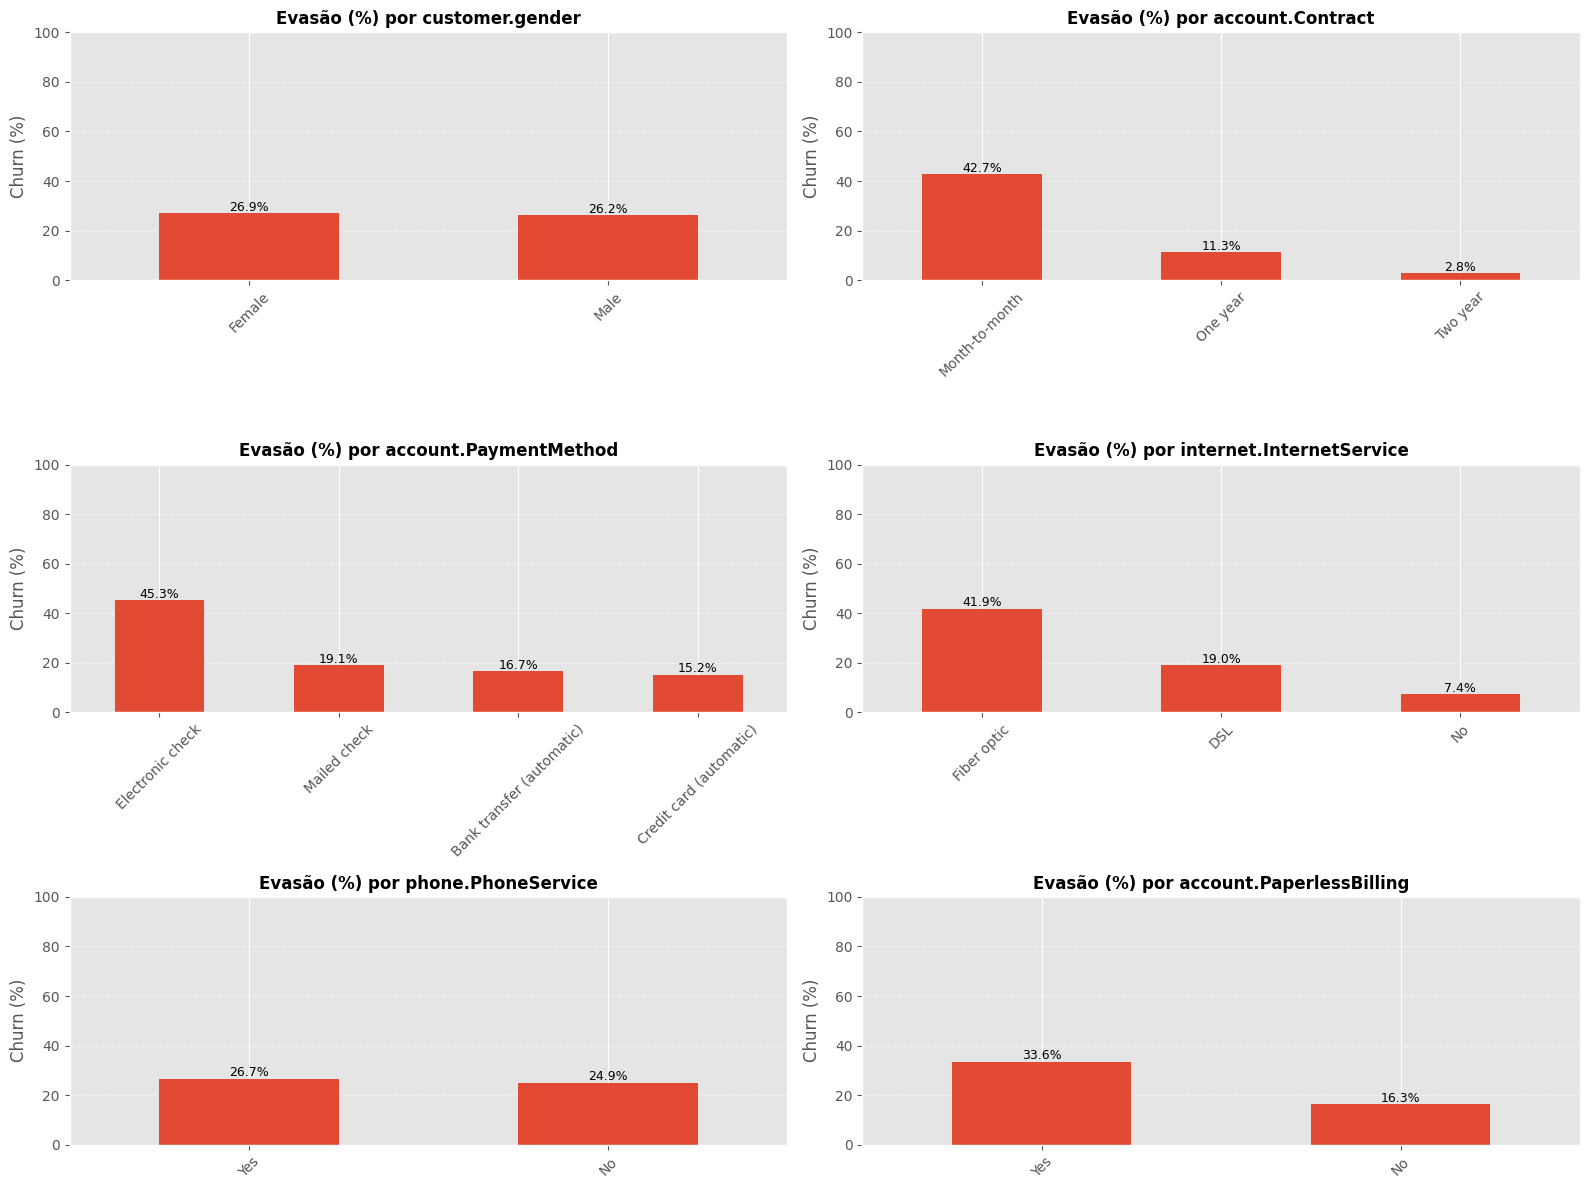

In [35]:
plt.style.use("ggplot")

variaveis_categoricas = [
    "customer.gender",
    "account.Contract",
    "account.PaymentMethod",
    "internet.InternetService",
    "phone.PhoneService",
    "account.PaperlessBilling"
]

fig, ax = plt.subplots(3, 2, figsize=(16, 12))
ax = ax.flatten()

for i, coluna in enumerate(variaveis_categoricas):
    churn_cat = (
        df.groupby(coluna)["Churn"]
        .value_counts(normalize=True)
        .unstack()
        .fillna(0) * 100
    )

    churn_yes = churn_cat["Yes"].sort_values(ascending=False)

    churn_yes.plot(kind="bar", ax=ax[i])

    ax[i].set_title(f"Evasão (%) por {coluna}", fontsize=12, weight="bold")
    ax[i].set_xlabel("")
    ax[i].set_ylabel("Churn (%)")
    ax[i].set_ylim(0, 100)
    ax[i].grid(axis="y", linestyle="--", alpha=0.5)
    ax[i].tick_params(axis="x", rotation=45)

    for j, v in enumerate(churn_yes):
      ax[i].text(j, v + 1, f"{v:.1f}%", ha="center", fontsize=9)

plt.tight_layout()
plt.show()

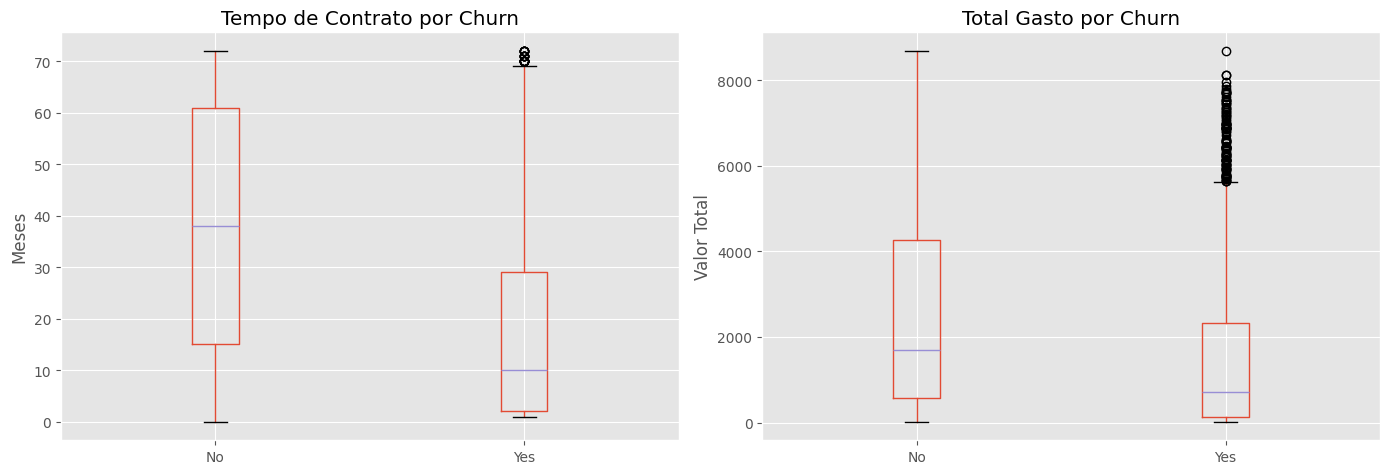

In [36]:

plt.style.use("ggplot")

fig, ax = plt.subplots(1, 2, figsize=(14,5))

df.boxplot(column="customer.tenure", by="Churn", ax=ax[0])
ax[0].set_title("Tempo de Contrato por Churn")
ax[0].set_xlabel("")
ax[0].set_ylabel("Meses")

df.boxplot(column="account.Charges.Total", by="Churn", ax=ax[1])
ax[1].set_title("Total Gasto por Churn")
ax[1].set_xlabel("")
ax[1].set_ylabel("Valor Total")

plt.suptitle("")
plt.tight_layout()
plt.show()

#📄Relatorio Final

# ANÁLISE DE EVASÃO (CHURN)

##1 - Introdução

O objetivo deste projeto foi analisar os dados da empresa Telecom X para entender os fatores que influenciam a evasão de clientes (Churn). A evasão representa o cancelamento do serviço e impacta diretamente a receita da empresa, tornando essencial identificar padrões e comportamentos associados a esse fenômeno.

A análise foi conduzida seguindo as etapas de ETL (Extração, Transformação e Carga), seguido de uma análise exploratória para identificar possíveis fatores de risco.

<br>

##2 - Limpeza e Tratamento de Dados

O processo de preparação dos dados envolveu as seguintes etapas:

- Importação dos dados diretamente da API em formato JSON.

- Normalização da estrutura aninhada do JSON para formato tabular.

- Remoção de 224 registros com valor vazio na variável Churn.

- Identificação de 11 registros com espaço em branco na coluna account.Charges.Total.

- Substituição dos valores inválidos por NaN e conversão da coluna para tipo numérico.

- Criação da variável Contas_Diarias a partir do faturamento mensal.

Após o tratamento, o dataset final ficou com 7.043 registros consistentes e prontos para análise.

<br>

##3 - Análise Exploratória de Dados

### -  Distribuição da Evasão

A taxa de churn observada foi de aproximadamente 26,5%, o que significa que cerca de 1 em cada 4 clientes cancelou o serviço. Esse percentual indica que a evasão é um problema relevante e merece atenção estratégica.

### -  Variáveis Categóricas com Maior Impacto

A análise dos gráficos revelou padrões claros:

**Tipo de Contrato**

Clientes com contrato mensal (Month-to-month) apresentaram taxa de evasão significativamente maior (42,7%) em comparação com contratos anuais (11,3%) e bianuais (2,8%).
Isso indica que quanto maior o comprometimento contratual, menor a probabilidade de cancelamento.  


**Método de Pagamento**

O método Electronic check apresentou a maior taxa de churn (45,3%), muito acima dos demais métodos. Esse padrão sugere que esse grupo pode ter menor vínculo ou maior sensibilidade a mudanças.

**Tipo de Internet**

Clientes com serviço de fibra óptica apresentaram taxa de evasão superior (41,9%) em comparação com DSL e clientes sem internet. Isso pode estar relacionado a expectativas mais altas, custo do serviço ou perfil de consumo.

*Outras variáveis como gênero e serviço telefônico não apresentaram diferenças relevantes.*

### - Variáveis Numéricas

A comparação entre clientes que cancelaram e os que permaneceram mostrou que:

- Clientes que cancelaram possuem menor tempo de contrato (tenure).

- Clientes que cancelaram possuem menor valor total acumulado.

Isso indica que a evasão ocorre, principalmente, nos primeiros meses de relacionamento, antes que o cliente gere maior valor para a empresa.

<br>

##4 - Conclusões e Insights

A evasão não ocorre de forma aleatória. Existe um padrão bem definido de maior risco, concentrado em clientes com:

- Contrato mensal;

- Pagamento via Electronic check;

- Serviço de fibra óptica;

- Baixo tempo de permanência.

Os resultados mostram que o nível de vínculo do cliente com a empresa é um fator central para retenção. Clientes com maior comprometimento contratual tendem a permanecer por mais tempo.

<br>

##5 - Recomendações

Com base nos resultados, recomenda-se:

- Incentivar a migração para contratos de maior duração.

- Monitorar clientes com pagamento via Electronic check.

- Avaliar possíveis melhorias na experiência do serviço de fibra óptica.

- Desenvolver ações de retenção focadas nos primeiros meses de contrato.

Essas medidas podem contribuir para reduzir a evasão e aumentar o tempo médio de permanência dos clientes.

<br>

##Resultado Final

O estudo permitiu identificar padrões consistentes associados à evasão, fornecendo base analítica para decisões estratégicas de retenção e melhoria da experiência do cliente.